In [2]:
#Importing the dependencies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Data collection and Analysis

#Loding the data from csv file to Pandas Dataframe
insurance_dataset = pd.read_csv("insurance.csv")


In [4]:
#Print first 5 rows of the data frame
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Finding the number of rows and columns in the data frame
insurance_dataset.shape

(1338, 7)

In [6]:
# Getting the information about the DataSet
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

    1. Sex (Male, Female)
    
    2. Somker (Yes, No)

    3. Region (southwest, southeast, northwest, northeast)

### Data Analysis

In [7]:
# Statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

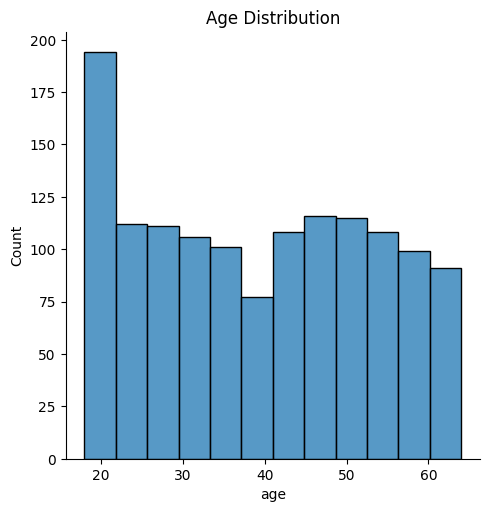

In [8]:
# Distribution of age value
plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show

In [9]:
insurance_dataset['age'].value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

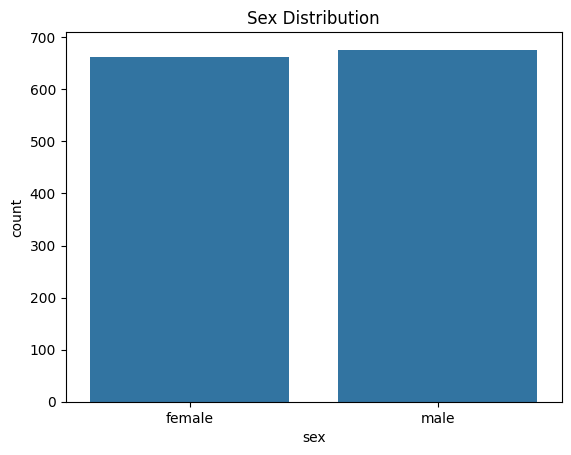

In [10]:
# Gender Column

plt.Figure(figsize=(6,6))
sns.countplot(x="sex", data= insurance_dataset)
plt.title("Sex Distribution")
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

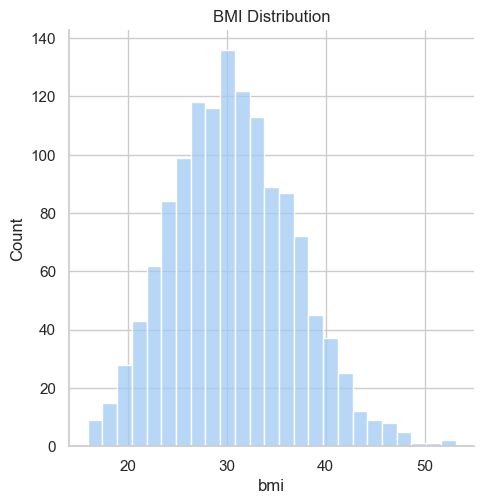

In [12]:
#BMI Distribution 

sns.set(style="whitegrid", palette="pastel")
plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show

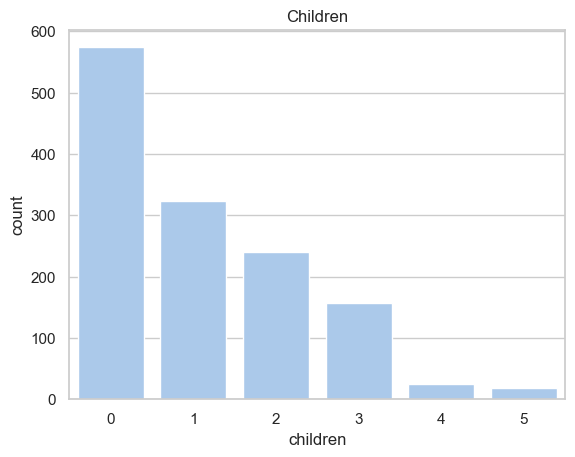

In [13]:
# Childern Column
plt.Figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title("Children")
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

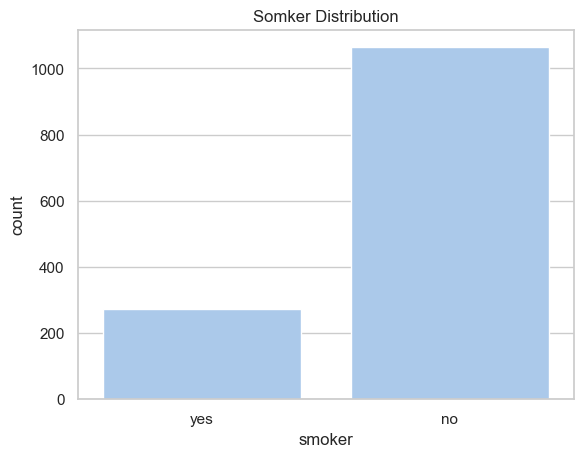

In [15]:
# Smoker Column

plt.Figure(figsize=(6,6))
sns.countplot(x="smoker", data= insurance_dataset)
plt.title("Somker Distribution")
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

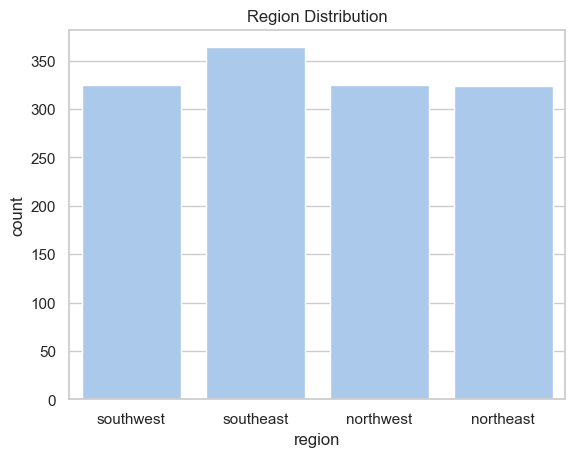

In [17]:
# Region Column

plt.Figure(figsize=(6,6))
sns.countplot(x="region", data= insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

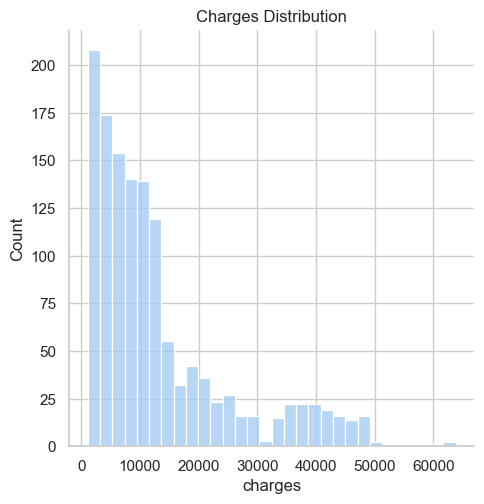

In [19]:
# Charges Distribution

plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title("Charges Distribution")
plt.show

### Data Pre-Processing

In [20]:
# Encoding the categorical feature
pd.set_option('future.no_silent_downcasting', True)

# 1. Encoding the sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# 2. Encoding the smoker column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# 3. Encodin the region column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast':2, 'northwest':3}}, inplace=True)


In [21]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Splitting the Features and Targets

In [22]:
X = insurance_dataset.drop(columns='charges', axis=1)  #Features 
Y = insurance_dataset['charges']                       #Target

### Spliting the data into Training data & Testing data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training


#### Simple Linear Regression

Y = mX + C ------> Line Equation  
 
where, 
Y = Prediction Probability

X = Input Features

M = Slope

C = Intercept


In [25]:
# Loading the Linear Regression Model 

regressor = LinearRegression()

regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluation

In [26]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

### R-squared

R-squared is a statistical measure that represents the goodness of fit of a regression model. 

The value of R-square lies between 0 to 1. 

Where we get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value. 

However, we get R-square equals 0 when the model does not predict any variability in the model and it does not learn any relationship between the dependent and independent variables.


In [31]:
# R sqaured value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R-squared value on training data: ", r2_train)

R-squared value on training data:  0.751505643411174


Now testing our trained model on the test data by calculating R-squared value

In [28]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [30]:
# R sqaured value

r2_test = metrics.r2_score(Y_test, test_data_prediction)
print("R-squared value on test data: ", r2_test)

R-squared value on test data:  0.7447273869684077


### Builting the predictive System

In [34]:
input_data = (31,1,25.74,0,1,0) #Taken any random row form the csv file and changed the value of Sex, Smoker ,region 

#Changing input data to numpy array
input_data_as_np_array = np.asarray(input_data)

#Reshape the array
input_data_reshape = input_data_as_np_array.reshape(1,-1)

prediction= regressor.predict(input_data_reshape)
# print(prediction) 

print("The insurance cost in USD", prediction[0])


The insurance cost in USD 3760.0805764960496


e:\OneDrive\Desktop\Data Science\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Actual Cost of the above used row = 3756.6216 And 

Cost predicted by the model = 3760.0805765